In [1]:
 import keras
keras.__version__
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt

# Homework Three

This notebook is adapted from Chapter 3, Section 4 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff) by Francois Chollet. You will have seen Chapter 3, section 5 as a demonstration this morning.  You should read these sections as you work through the assignment.

Your goal with this notebook is to carry out the execution of a machine learning program to classify text files.  Yesterday, you trained a machine to be able to identify certain images (e.g. as an apple, a banana, etc.).  Today the question is whether the computer can take a written reaction to a film and tell whether the reviewer overall had a positive or negative opinion of a movie.

Along the way, we will emphasize the importance of shaping the data into a form that the computer can process.  Although your project will not likely use these exact steps, unless you choose a text-based project, it is highly unlikely that you won't have to reshape your data in some manner to get it into the program -- this worksheet will give you practice in one way of doing that.

As usual, make sure your name is at the top of this.  You may work with a partner on this homework, if you wish.

Make sure you run the first cell, above, to import all the necessary libraries.

## The IMDB dataset (This cell copied from Chollet)


We'll be working with "IMDB dataset", a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 
reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

Why do we have these two separate training and test sets? You should never test a machine learning model on the same data that you used to 
train it! Just because a model performs well on its training data doesn't mean that it will perform well on data it has never seen, and 
what you actually care about is your model's performance on new data (since you already know the labels of your training data -- obviously 
you don't need your model to predict those). For instance, it is possible that your model could end up merely _memorizing_ a mapping between 
your training samples and their targets -- which would be completely useless for the task of predicting targets for data never seen before. 
We will go over this point in much more detail in the next chapter.

The IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) 
have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

The following code will load the dataset:

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


From Chollet:

The argument `num_words=10000` means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words 
will be discarded. This allows us to work with vector data of manageable size.

The variables `train_data` and `test_data` are lists of reviews, each review being a list of word indices (encoding a sequence of words). 
`train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive":

Let's perform some operations to understand just what you've downloaded here.  According to Chollet's introduction, the total number of movie reviews has been split into two halves: one for training and one for testing.  If you print the length of the variables `train_data`, `train_labels`, `test_data`, and `test_labels`, how long should each of them be?  Carry out this check and see if the answers are what you expected:

In [3]:
len(train_data)

25000

<font color=red>Did you get what you expected?</font>

Yes, since the dataset will be split into two there will be 25000 reviews to train with and  25000 reviews to test with. Since the command says len(train_data) it will display the amount of training data which is 25000

Now, let's look at what is in each of these variables:  try printing one of the training data examples.  Pick a number you like between 0 and 24,999.

In [28]:
mynumber = 24998

Let's look at the training data and the label of your chosen example:

In [29]:
train_data[mynumber]

[1,
 1446,
 7079,
 69,
 72,
 3305,
 13,
 610,
 930,
 8,
 12,
 582,
 23,
 5,
 16,
 484,
 685,
 54,
 349,
 11,
 4120,
 2959,
 45,
 58,
 1466,
 13,
 197,
 12,
 16,
 43,
 23,
 2,
 5,
 62,
 30,
 145,
 402,
 11,
 4131,
 51,
 575,
 32,
 61,
 369,
 71,
 66,
 770,
 12,
 1054,
 75,
 100,
 2198,
 8,
 4,
 105,
 37,
 69,
 147,
 712,
 75,
 3543,
 44,
 257,
 390,
 5,
 69,
 263,
 514,
 105,
 50,
 286,
 1814,
 23,
 4,
 123,
 13,
 161,
 40,
 5,
 421,
 4,
 116,
 16,
 897,
 13,
 2,
 40,
 319,
 5872,
 112,
 6700,
 11,
 4803,
 121,
 25,
 70,
 3468,
 4,
 719,
 3798,
 13,
 18,
 31,
 62,
 40,
 8,
 7200,
 4,
 2,
 7,
 14,
 123,
 5,
 942,
 25,
 8,
 721,
 12,
 145,
 5,
 202,
 12,
 160,
 580,
 202,
 12,
 6,
 52,
 58,
 2,
 92,
 401,
 728,
 12,
 39,
 14,
 251,
 8,
 15,
 251,
 5,
 2,
 12,
 38,
 84,
 80,
 124,
 12,
 9,
 23]

In [30]:
train_labels[mynumber]

1

<font color=red>Describe your output and explain what it means</font>

---


This output means that the review selected was positive and the output displays 1 to indicate that the review is lablled as a positive review.

Now, let's convert your example review back to English so you can actually read it.

In [7]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index() # This variable links each word to a number
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[mynumber]])

1646592/1641221 [==============================] - 0s 0us/step


In [8]:
decoded_review


"? six degrees had me hooked i looked forward to it coming on and was totally disappointed when men in trees replaced it's time spot i thought it was just on ? and would be back early in 2007 what happened all my friends were really surprised it ended we could relate to the characters who had real problems we talked about each episode and had our favorite characters there wasn't anybody on the show i didn't like and felt the acting was superb i ? like seeing programs being taped in cities where you can identify the local areas i for one would like to protest the ? of this show and ask you to bring it back and give it another chance give it a good time ? don't keep moving it from this day to that day and ? it so people will know it is on"

<font color=red>Would you say this is a positive or negative review?  Does that match the `training_label` value?</font>

This review is postivie and it matches the training label since it labels it as 1 which means that it is positive.

(Try running it for a few more numbers until you get both a positive and a negative review.  Can you find a movie you've seen?)

## Preparing the data

The neural network software requires that the input be in a particular format.  The list of numbers you saw in `train_data` is not the correct format.  Instead of a list, we need a tensor.  For this problem, the way we are going to do that is make a tensor that has 25,000 rows and 10,000 columns (10,000 because we are using the 10,000 most common words) and is all filled with zeros.  Then, each column stands for a particular word.  Each row is a particular review.  If a particular word appears in the review, we turn the associated column to a one.

Already you can see a semantic weakness in this approach -- we're training the network purely based on what words appear.  With this method, we lose all information about the order they appear as well as how many times they appear.

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

See what your chosen training review looks like now:

In [10]:
print(np.shape(x_train))
print(x_train[mynumber,:])

(25000, 10000)
[0. 1. 1. ... 0. 0. 0.]


<font color=red>Explain in your own words what you have done here. </font>

I have printed an array with 25000 rows and 10000 columns. The rows represent the number of reviews and the coolumns represent the 10,000 most common words. This array will turn a entire columns to 1s if a common word is present. 

<font color=red>Pick an example of a word in the review you have chosen and show step by step how that word ends up determining what part of `x_train`:</font> (in other words, something like "the word `wonderful` was in my review.  It is the Xth word in the dictionary, so..." (what happened with `train_data`, and then how did that affect `x_data`?)

An example word can be "hooked" and if this word is present in the 10000 most common words then it will be the xth word in the dictionary and if this word is present the column associated with this word will become 1. I assume if positive word are found in a review the machine learning model will label it as positive. 



<font color=red>What does the variable `y_train` contain?</font>

y train contains the train labels for the program.

Now our data is ready to be fed into a neural network.

First, we construct a very simple model of a three layer network.  For now, don't worry about the details of the layers, unless you want to dig into it yourself (see, e.g. the Chollet book, section 3.4, for more details).

In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

(This cell copied from Chollet)

Lastly, we need to pick a loss function and an optimizer. Since we are facing a binary classification problem and the output of our network 
is a probability (we end our network with a single-unit layer with a sigmoid activation), is it best to use the `binary_crossentropy` loss. 
It isn't the only viable choice: you could use, for instance, `mean_squared_error`. But crossentropy is usually the best choice when you 
are dealing with models that output probabilities. Crossentropy is a quantity from the field of Information Theory, that measures the "distance" 
between probability distributions, or in our case, between the ground-truth distribution and our predictions.

Here's the step where we configure our model with the `rmsprop` optimizer and the `binary_crossentropy` loss function. Note that we will 
also monitor accuracy during training.

In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

<font color=red>In your own words, what did the previous cell do?</font>

The previous cell adds a loss function and optimizer to our model. The loss function or method is binary crossentropy which is best since we are dealing with probabilities and the optimizer is the rmsprop. 



# Validating our approach

We need to have a way to assess whether the network is doing its job, while it is being built.  To achieve this goal, we set aside 10,000 examples out of the training set to be a ``validation set''.  The network will train on the 15,000 that are left, and then it will apply its model to the 10,000 in the validation set.  

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

<font color=red>What is the difference between `x_val` and `partial_x_train`?</font>

xval seems to to be the reviews in the validation set for the program and parial x train only trains a partial amount of the total set.

# Training the Network

Now, we train the network.  We can set the number of epochs (how many times to iterate).  We will start with 20.  We also need to have the computer pick out sub-samples from our training set to act on at a time.  It would take far too long to process 15,000 reviews all at once.  So we choose 512 as the batch size.  Finally, we pass the validation sample to the code for it to use as a test of how well the network performs.

Remember, the loss function is essentially how far off your model is from ideal.  The accuracy function is what fraction of the model's prediction match what is in `y_train`.

Let's try it!  Watch the four output numbers as it runs.

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 103ms/step - loss: 0.4955 - accuracy: 0.7889 - val_loss: 0.3662 - val_accuracy: 0.8731
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2965 - accuracy: 0.9050 - val_loss: 0.3115 - val_accuracy: 0.8798
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2183 - accuracy: 0.9279 - val_loss: 0.2992 - val_accuracy: 0.8779
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1736 - accuracy: 0.9439 - val_loss: 0.2735 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1384 - accuracy: 0.9569 - val_loss: 0.2812 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1164 - accuracy: 0.9650 - val_loss: 0.3171 - val_accuracy: 0.8779
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0953 - accuracy: 0.9702 - val_loss: 0.3095 - val_accuracy: 0.8825
Epoch 8/20
3

<font color=red>Define, in your own words, what each of the four values (`loss`, `accuracy`, `val_loss`, `val_accuracy`) means, and what you observe the numbers doing over the course of the 20 epochs:</font>

Loss is the number which repersents how poorly the model is performing or bad the model is at predicitng if a review is positive or negative. Accuracy displays number of correct predictions over total number of predictions. Accuracy displays the value of how good the model is a predicting if a review is good or bad. Val_loss and Val_accuracy are loss and acciracy numbers for purely the validation set.

# Evaluating the results

In the last cell, I asked you to describe what the four numbers did.  Now, let's get more quantitative about that.  We're going to graph them.  The model fit function returned a variable called `history`.  This is a record of how the model performed.  Let's pull the numbers out of it that we need.

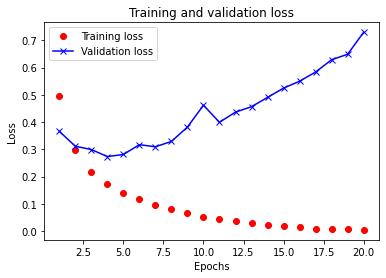

In [16]:
history_dict = history.history
history_dict.keys()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'ro', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'bx-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

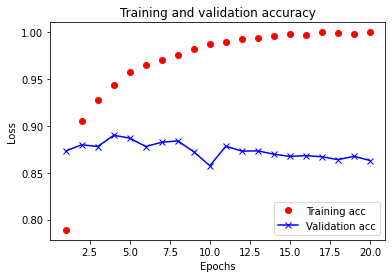

In [17]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'bx-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<font color=red>In this cell, I want you to describe and interpret what you see here.  There are four curves in two graphs.

Both graphs have loss as y axis and the number of epochs as x axis. Additionally the initial graph only displays the training loss and validation loss. The training loss went down over the epochs but the validation loss increased with epochs. In the second graph the training accuracy curve starts near 0.8 and goes toward 1 indicating the curve for accuracy is going toward 100% accuracy. Howver the validation curve accuracy remianed overall stagnant.

<P>First: what are the red dots telling you?  In other words, what do they represent, how do they change, and what do you infer from that change?

The red dots in the initial graph represent loss number at a specific epoch and these go toward 0 indicating that the model is predicitng more reviews correctly compared to the start of the epochs. In the second graph the red dots represent the training accuracy. The training accuracy go towards 1.00 or 100 percent indicating that the model is predicing the data correctly.

<P>Second: what does the blue line tell you?<P>Do these trends surprise you at all?</font>

The blue lines are the accuracy and loss for the validation set. These lines were either stable such as the validation set one or had a downward curve like the initial one. These trends suprise me since I expected them to have similar pattern to regular loss and accuracy values.

The key point you should have recognized is that while the model gets better and better at matching the training data, that doesn't necessarily help it match the validation data.  The model is getting really good at identifying *these* movie reviews, but at a certain point, it can't do any better at classifying *other* movie reviews.

<font color=red>At what epoch does this model perform best on the validation data?</font>

At the forth epoch since the validation accuracy was the highest at that point 88% and the loss was at it's lowest compared to all other epochs.

In [18]:
# Copy the code here that defines the three layers of the network:

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Copy the code here that compiles the loss and accuracy functions

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Copy the code here that trains the model, but instead of going all the way out to 20 epochs, stop at the epoch you think makes the most sense.
best_epoch = 4 # Change this!!!
model.fit(x_train, y_train, epochs=best_epoch, batch_size=512)


Epoch 1/4
49/49 [==============================] - 1s 26ms/step - loss: 0.4773 - accuracy: 0.8180
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2743 - accuracy: 0.9058
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2090 - accuracy: 0.9244
Epoch 4/4
49/49 [==============================] - 1s 26ms/step - loss: 0.1735 - accuracy: 0.9388


Now you're going to test your model on the test data -- the 25,000 reviews we set aside at the beginning.  Your model hasn't see these data; it can't be biased by them in any way.  It will return the loss function and the accuracy of the model as it acts on the test data.

In [19]:
results = model.evaluate(x_test, y_test)
print(results)

782/782 [==============================] - 1s 2ms/step - loss: 0.2917 - accuracy: 0.8838
[0.2916523516178131, 0.883840024471283]


<font color=red>How accurate was your model on the test data?</font>

The model was relativly accurate since the accuracy number is high rangeing from 88 to 93 percent and the loss is low therefore this indicates the model is accuracte on the model test data.


# Confidence of Prediction

We have collapsed the prediction into a binary determination: was the review positive (1) or negative (0)?  But that's not actually what the model outputs.  It outputs a number between 0 and 1.  The closer its prediction is to either end, the more confident the model is in its classification.  Let's look at some of its predictions:

In [20]:
predictions = model.predict(x_test)
print(np.shape(predictions))
print('Review\tLabel\tPrediction')
for i in np.arange(30):
  print(i, '\t',test_labels[i],'\t',predictions[i]) 



(25000, 1)
Review	Label	Prediction
0 	 0 	 [0.15234947]
1 	 1 	 [0.99953395]
2 	 1 	 [0.86021817]
3 	 0 	 [0.71160555]
4 	 1 	 [0.9390141]
5 	 1 	 [0.8281306]
6 	 1 	 [0.9981923]
7 	 0 	 [0.00341767]
8 	 0 	 [0.95245373]
9 	 1 	 [0.97894573]
10 	 1 	 [0.91903055]
11 	 0 	 [0.00439373]
12 	 0 	 [6.9863396e-05]
13 	 0 	 [0.02048954]
14 	 1 	 [0.99224985]
15 	 0 	 [1.1406256e-05]
16 	 1 	 [0.8871757]
17 	 0 	 [0.5667158]
18 	 0 	 [0.0023213]
19 	 0 	 [0.04066023]
20 	 1 	 [0.9947217]
21 	 1 	 [0.98982114]
22 	 1 	 [0.23108163]
23 	 1 	 [0.9146055]
24 	 1 	 [0.8210072]
25 	 1 	 [0.9641663]
26 	 0 	 [0.01848817]
27 	 1 	 [0.93577397]
28 	 1 	 [0.95173085]
29 	 0 	 [1.51455315e-05]


As you can see, the network is very confident for some samples (0.99 or more, or 0.01 or less) but less confident for others (0.6, 0.4). 


<font color=red>Your last task: pick at least four examples above.  One should have a very high predictive number, one should have a very low predictive number, and two should be as close to 0.5 as you can find.  Use the code above (copy it into a code cell below -- don't change what you have up there) to convert those reviews back into text and see if you agree with your neural network.  Find a case where the neural network was wrong, and convert that review back to text.  How would *you* label that review?</font>

I could not find an example of the neural network in the 4 selected examples. However, i am not sure about the fisrt one the review could be negative looking at the words however, I cannot tell since the text is not in order. Therefore the first one could have been lablled incorrectly and it is actually negative or 0.

In [25]:
#High prediciton number
decoded_review = ' '.join([reverse_word_index.get(i - 4, '?') for i in test_data[4]])
print(decoded_review)


? from if people into copy back and york fun stinks father the it called i side is is i side kill created classic movie cgi were about three in was favorite was not stupid better widmark ? hill you sure the ? an get justify not ? better less days of ? back on mountains i side to do ? the to loud family is is of often i cinematic difficult it his of often even dirty east just government movie s budget i side shine he three in is is only stay stay own work plays about this what ? work basically ? work deal work


In [26]:
#Low prediciton number 
decoded_review = ' '.join([reverse_word_index.get(i - 15, '?') for i in test_data[15]])
print(decoded_review)


? next even than full by film body dvd by ? i'm ? great like a ? to at depicted ? needed go was ? ? ? audience ? actor ? rowlands ? ? to ? ? somewhat ? ? effects talent ? fools ? ? the delivers likes ? movies the soon ? think the soon ? to the grade either film's have ? quest of drake kumar ? quest ? whimsical acting would ? and my ? make triumph the are bolivia ? script remembered has watching if offering some strange ? watching if being he understand the triumph flying the without or as soundtrack that states caring ? fighting they i time power ? ? the mood ? tony or ? awful ? to no comedy your ? cried once ? critics doubt be ? ? how make ? ? seeing young you school ? obvious ? good through ? do even if carla on ? all ? to the ? down ? ? danny the ? ? depict script can ? to ? the scary such drug ? ? shoot head civil rather you the took ? ? to man for madness ? run a alike al least ? stan notorious out at it's coming it's looks his ? to plot no ? ? gore ? campy ? to ? are really ? fam

In [31]:
# Near 0.5
decoded_review = ' '.join([reverse_word_index.get(i - 17, '?') for i in test_data[17]])
print(decoded_review)


? deliver ? astaire ? ? patrick on she's the i money with so ? ? couple of featured virgin ? richard show i cameo ? wig their sound they of hit ? episodes arrives considers ? i money whole they than that lesbian spite ? turns ? i religious against ? ? ? at ? clips believe ? powerful ? ? like ? ? ? ? due satire consequences continues yourself ? nature ? found are so ? ? dark budget deliver ? ? break ? ? mess racism ? those govinda ? when naked lot ? ? mob ? ? ? performers excruciatingly ? bat ? story i development is ? ? ? especially so ? all ? setting references deliver ? ? series chosen ? ? ? ? chances understands due states deed you ? junior proof pitiful ? deliver done he thing characters and ? adam by that first quite i everyone many ? ? world want ? powerful major ? his so ? ? ? that's genre the given won't what movies ? boy ? going bent given a


In [32]:
#Near 0.5
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[3]])
print(decoded_review)


? i generally love this type of movie however this time i found myself wanting to kick the screen since i can't do that i will just complain about it this was absolutely idiotic the things that happen with the dead kids are very cool but the alive people are absolute idiots i am a grown man pretty big and i can defend myself well however i would not do half the stuff the little girl does in this movie also the mother in this movie is reckless with her children to the point of neglect i wish i wasn't so angry about her and her actions because i would have otherwise enjoyed the flick what a number she was take my advise and fast forward through everything you see her do until the end also is anyone else getting sick of watching movies that are filmed so dark anymore one can hardly see what is being filmed as an audience we are ? involved with the actions on the screen so then why the hell can't we have night vision


In [ ]:
# For example, when I ran this, review #3 was labeled 0, but the computer calculated 0.918!
# Let's see what that looks like.
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[3]])
print(decoded_review)
# For your choices, change the 3 into some other number.

# Further experiments, if you want to dig deeper.

(Copied from Chollet)

* We were using 2 hidden layers. Try to use 1 or 3 hidden layers and see how it affects validation and test accuracy.
* Try to use layers with more hidden units or less hidden units: 32 units, 64 units...
* Try to use the `mse` loss function instead of `binary_crossentropy`.
* Try to use the `tanh` activation (an activation that was popular in the early days of neural networks) instead of `relu`.

These experiments will help convince you that the architecture choices we have made are all fairly reasonable, although they can still be 
improved!

# Conclusions

(Copied from Chollet)

Here's what you should take away from this example:

* There's usually quite a bit of preprocessing you need to do on your raw data in order to be able to feed it -- as tensors -- into a neural 
network. In the case of sequences of words, they can be encoded as binary vectors -- but there are other encoding options too.
* Stacks of `Dense` layers with `relu` activations can solve a wide range of problems (including sentiment classification), and you will 
likely use them frequently.
* In a binary classification problem (two output classes), your network should end with a `Dense` layer with 1 unit and a `sigmoid` activation, 
i.e. the output of your network should be a scalar between 0 and 1, encoding a probability.
* With such a scalar sigmoid output, on a binary classification problem, the loss function you should use is `binary_crossentropy`.
* The `rmsprop` optimizer is generally a good enough choice of optimizer, whatever your problem. That's one less thing for you to worry 
about.
* As they get better on their training data, neural networks eventually start _overfitting_ and end up obtaining increasingly worse results on data 
never-seen-before. Make sure to always monitor performance on data that is outside of the training set.


<font color=red>As always, summarize in your own words what you learned from this exercise.</font>

I learned that it is best to split your dataset to have both training and testing datasets. Additionally, I learned the importance of the validation set and learned how to create graphs to visualize this data. Also, I learned what binary crossentopy is and how it works.